### Imports

In [1]:
from agents.fact_checker_agent import FactCheckerAgent
from network.socialnetwork import SocialNetworkEnv
from agents.news_agent import NewsAgent
import numpy as np

### Setup

Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 2: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 3: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 4: {'agentType': 'fake-information', 'qVal': 0.0, 'trustLevel': 0.0, 'reward': 0, 'penalty': 0}
Node 5: {'agentType': 'real-information', 'qVal': 0.0, 'trustLevel': 0.0, 'reward': 0, 'penalty': 0}
Node 6: {'agentType': 'fact-checker', 'qVal': 0.0, 'trustLevel': 0.0, 'reward': 0, 'penalty': 0}
Graph Edges:
Edge 0 -> 2: {'weight': 1.0}
Edge 0 -> 1: {'weight': 1.0}
Edge 1 -> 3: {'weight': 1.0}
Edge 1 -> 2: {'weight': 1.0}
Edge 2 -> 1: {'weight': 1.0}
Edge 2 -> 0: {'weight': 1.0}
Edge 2 -> 3: {'weight': 1.0}
Edge 4 -> 0: {}
Edge 4 -> 1: {}
Edge 4 -> 2: {}
Edge 4 -> 3: {}
E

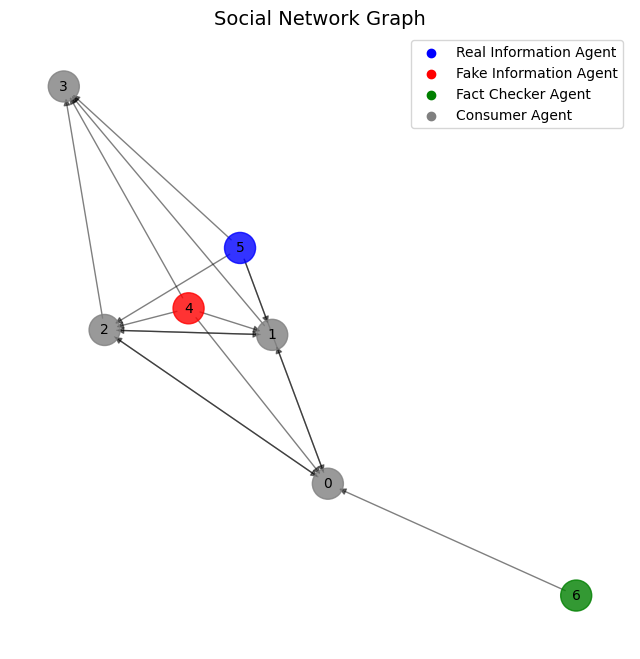

Node 0: Points to -> 2, 1
Node 1: Points to -> 3, 2
Node 2: Points to -> 1, 0, 3
Node 3: Points to -> None
Node 4: Points to -> 0, 1, 2, 3
Node 5: Points to -> 0, 1, 2, 3
Node 6: Points to -> 0


In [ ]:
network = SocialNetworkEnv(numConsumer=4)

# created a fake and real info agent and add a few consumers to the network
fAgent = NewsAgent("fake-information", state_space_size=2, env=network, trustLevel=0)
rAgent = NewsAgent("real-information", state_space_size=2, env=network, trustLevel=0)
fcAgent = FactCheckerAgent("fact-checker", trustLevel=0.0)
network.add_news_agents_to_network(agentType=fAgent)
network.add_news_agents_to_network(agentType=rAgent)
network.add_fact_checker_to_network(agentType=fcAgent)

action = network.draw_sample_from_action_space()
network.render()

print("---------------- Initial Graph ---------------")
network.print_graph()

### Training

Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 2: {'agentType': 'consumer', 'trustLevel': 0.1, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 3: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 4: {'agentType': 'fake-information', 'qVal': 0.19, 'trustLevel': 0.0, 'reward': 1, 'penalty': 0}
Node 5: {'agentType': 'real-information', 'qVal': 0.38, 'trustLevel': 0.0, 'reward': 2, 'penalty': 0}
Node 6: {'agentType': 'fact-checker', 'qVal': 0.0, 'trustLevel': 0.0, 'reward': 0, 'penalty': 0}
Graph Edges:
Edge 0 -> 2: {'weight': 1.0}
Edge 0 -> 1: {'weight': 1.0}
Edge 1 -> 3: {'weight': 1.0}
Edge 1 -> 2: {'weight': 1.0}
Edge 2 -> 1: {'weight': 1.0}
Edge 2 -> 0: {'weight': 1.0}
Edge 2 -> 3: {'weight': 1.0}
Edge 4 -> 0: {}
Edge 4 -> 1: {}
Edge 4 -> 2: {}
Edge 4 -> 3: {}

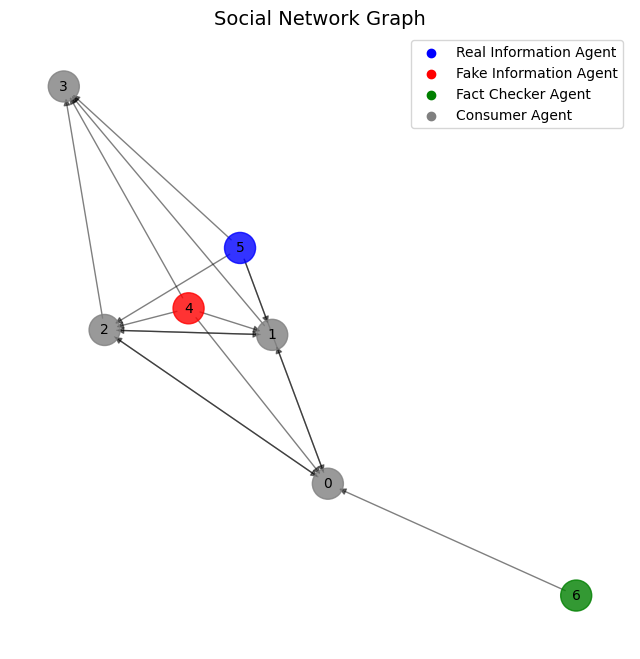

--------- epoch 0 ---------------------


 ------------fake info -------------
Observation: {'trustLevels': array([ 0. ,  0. ,  0. , -0.1,  0. ,  0. ,  0. ])}
Reward: 1
Info: {}


 ------------real info -------------
Observation: {'trustLevels': array([0. , 0. , 0.1, 0. , 0. , 0. , 0. ])}
Reward: 2
Info: {}
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0.1, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 2: {'agentType': 'consumer', 'trustLevel': 0.1, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 3: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 4: {'agentType': 'fake-information', 'qVal': 0.5509999999999999, 'trustLevel': 0.0, 'reward': 2, 'penalty': 0}
Node 5: {'agentType': 'real-information', 'qVal': 1.1019999999999999, 'trustLevel': 0.0, 'reward': 4, 'penalty': 0}
Node 6: {'agentType': 'fact-checker', '

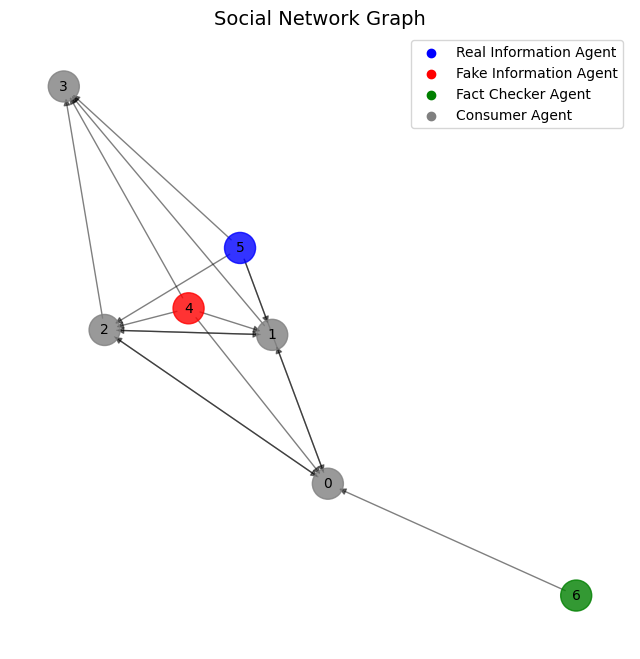

--------- epoch 1 ---------------------


 ------------fake info -------------
Observation: {'trustLevels': array([0., 0., 0., 0., 0., 0., 0.])}
Reward: 2
Info: {}


 ------------real info -------------
Observation: {'trustLevels': array([0. , 0.1, 0.1, 0. , 0. , 0. , 0. ])}
Reward: 4
Info: {}
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0.1, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 2: {'agentType': 'consumer', 'trustLevel': 0.1, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 3: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 4: {'agentType': 'fake-information', 'qVal': 1.2559, 'trustLevel': 0.0, 'reward': 4, 'penalty': 0}
Node 5: {'agentType': 'real-information', 'qVal': 2.1318, 'trustLevel': 0.0, 'reward': 6, 'penalty': 0}
Node 6: {'agentType': 'fact-checker', 'qVal': 0.0, 'trustLevel': 0.0, 'reward

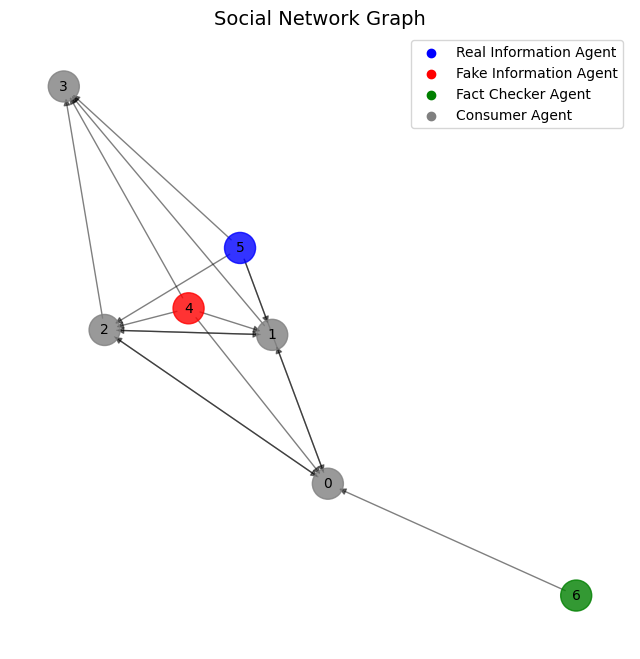

--------- epoch 2 ---------------------


 ------------fake info -------------
Observation: {'trustLevels': array([0., 0., 0., 0., 0., 0., 0.])}
Reward: 4
Info: {}


 ------------real info -------------
Observation: {'trustLevels': array([0. , 0.1, 0.1, 0. , 0. , 0. , 0. ])}
Reward: 6
Info: {}
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0.1, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 2: {'agentType': 'consumer', 'trustLevel': 0.2, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 3: {'agentType': 'consumer', 'trustLevel': -0.1, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 4: {'agentType': 'fake-information', 'qVal': 2.2703100000000003, 'trustLevel': 0.0, 'reward': 6, 'penalty': 0}
Node 5: {'agentType': 'real-information', 'qVal': 3.4386200000000002, 'trustLevel': 0.0, 'reward': 8, 'penalty': 0}
Node 6: {'agentType': 'fact-checker', 'qVal': 0.0, '

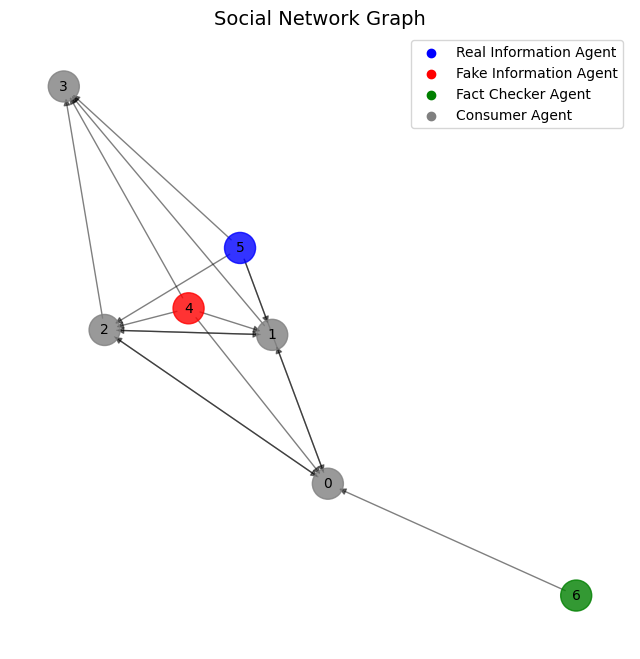

--------- epoch 3 ---------------------


 ------------fake info -------------
Observation: {'trustLevels': array([ 0. ,  0. ,  0.1, -0.1,  0. ,  0. ,  0. ])}
Reward: 6
Info: {}


 ------------real info -------------
Observation: {'trustLevels': array([ 0. ,  0.1,  0.2, -0.1,  0. ,  0. ,  0. ])}
Reward: 8
Info: {}
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0.2, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 2: {'agentType': 'consumer', 'trustLevel': 0.30000000000000004, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 3: {'agentType': 'consumer', 'trustLevel': -0.2, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 4: {'agentType': 'fake-information', 'qVal': 3.373279, 'trustLevel': 0.0, 'reward': 7, 'penalty': 0}
Node 5: {'agentType': 'real-information', 'qVal': 4.994758, 'trustLevel': 0.0, 'reward': 10, 'penalty': 0}
Node 6: {'agentType': 'fact-checke

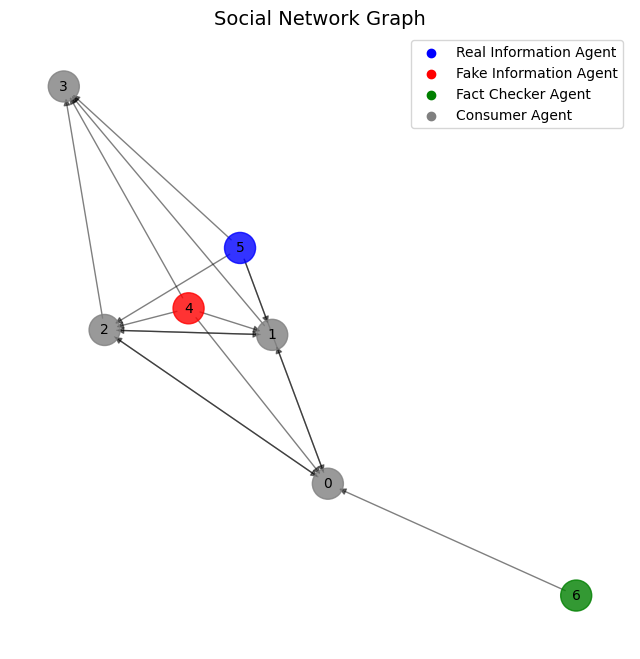

--------- epoch 4 ---------------------


 ------------fake info -------------
Observation: {'trustLevels': array([ 0. ,  0.1,  0.2, -0.2,  0. ,  0. ,  0. ])}
Reward: 7
Info: {}


 ------------real info -------------
Observation: {'trustLevels': array([ 0. ,  0.2,  0.3, -0.2,  0. ,  0. ,  0. ])}
Reward: 10
Info: {}
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0.2, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 2: {'agentType': 'consumer', 'trustLevel': 0.4, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 3: {'agentType': 'consumer', 'trustLevel': -0.20000000000000004, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 4: {'agentType': 'fake-information', 'qVal': 4.5559511, 'trustLevel': 0.0, 'reward': 8, 'penalty': 0}
Node 5: {'agentType': 'real-information', 'qVal': 6.7752822, 'trustLevel': 0.0, 'reward': 12, 'penalty': 0}
Node 6: {'agentType': 'fact-che

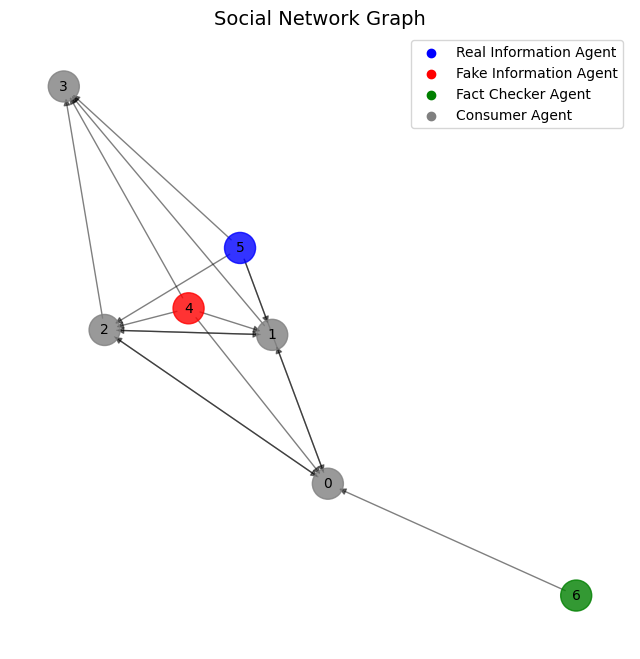

--------- epoch 5 ---------------------


 ------------fake info -------------
Observation: {'trustLevels': array([ 0. ,  0.2,  0.3, -0.3,  0. ,  0. ,  0. ])}
Reward: 8
Info: {}


 ------------real info -------------
Observation: {'trustLevels': array([ 0. ,  0.2,  0.4, -0.2,  0. ,  0. ,  0. ])}
Reward: 12
Info: {}
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0.0, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0.2, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 2: {'agentType': 'consumer', 'trustLevel': 0.4, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 3: {'agentType': 'consumer', 'trustLevel': -0.20000000000000004, 'storedInfo': [], 'reward': 0, 'penalty': 0}
Node 4: {'agentType': 'fake-information', 'qVal': 6.00035599, 'trustLevel': 0.0, 'reward': 10, 'penalty': 0}
Node 5: {'agentType': 'real-information', 'qVal': 8.75775398, 'trustLevel': 0.0, 'reward': 14, 'penalty': 0}
Node 6: {'agentType': 'fact-

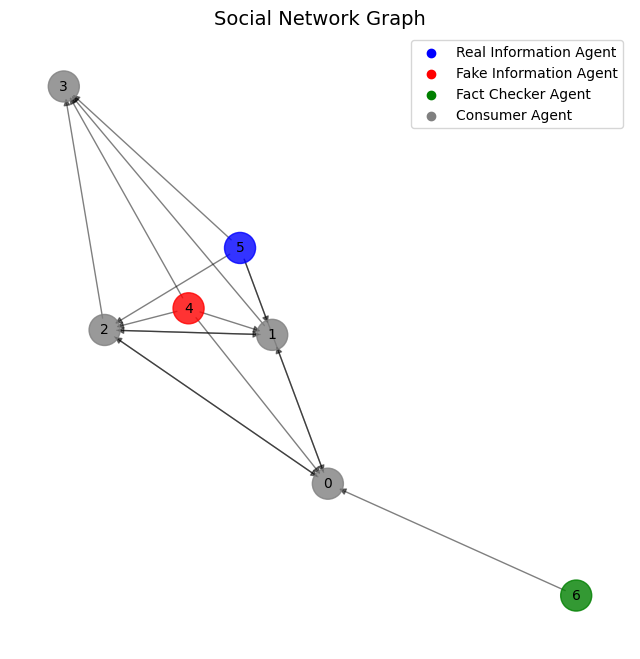

--------- epoch 6 ---------------------


 ------------fake info -------------
Observation: {'trustLevels': array([ 0. ,  0.2,  0.3, -0.3,  0. ,  0. ,  0. ])}
Reward: 10
Info: {}


 ------------real info -------------
Observation: {'trustLevels': array([ 0. ,  0.2,  0.4, -0.2,  0. ,  0. ,  0. ])}
Reward: 14
Info: {}


In [ ]:


for i in range(network.network_size):
    obs, reward, info = network.step(action, fAgent)
    obs2, reward2, info2 = network.step(action, rAgent)
    network.render()
    network.print_graph()

    print(f"--------- epoch {i} ---------------------")
    print("\n\n ------------fake info -------------")
    print("Observation:", obs)
    print("Reward:", reward)
    print("Info:", info)

    print("\n\n ------------real info -------------")
    print("Observation:", obs2)
    print("Reward:", reward2)
    print("Info:", info2)
